In [85]:
%pylab inline
import pandas as pd 
import fnmatch
import scipy.stats as stats
import os
from collections import Counter
from  stats_helper import *

users = pd.read_csv("Crowdclass_Data.csv")
dataA = users[users["Group"]=="A"]
dataB = users[users["Group"]=="B"]
headers = list(users.columns)

Populating the interactive namespace from numpy and matplotlib


### Difficulty counts 

In [86]:
print mean(dataB["easy_count"])
print mean(dataB["med_count"])
print mean(dataB["hard_count"])

13.4042553191
5.04255319149
12.2978723404


In [87]:
print len(dataB[dataB["easy_count"]!=0])/float(len(dataB))*100. ,"%"
print len(dataB[dataB["med_count"]!=0])/float(len(dataB))*100.,"%"
print len(dataB[dataB["hard_count"]!=0])/float(len(dataB))*100.,"%"

100.0 %
89.3617021277 %
80.8510638298 %


### Img classified 

In [114]:
A = dataA["img_classified"]
B = dataB["img_classified"]

In [89]:
def print_stats_non_parametric(A,B):
    np.set_printoptions(precision=4)
    print np.array([mean(A),std(A),min(A),max(A),percentile(A,25),percentile(A,50),percentile(A,75)])
    print np.array([mean(B),std(B),min(B),max(B),percentile(B,25),percentile(B,50),percentile(B,75)])

In [90]:
print_stats_non_parametric(A,B)

[ 37.7174  19.369   10.      86.      20.25    35.5     50.    ]
[ 30.7447  18.332    6.      86.      17.5     26.      41.    ]


In [81]:
run_all_non_parametric_analysis(A,B,"Img_classified")

---------------------------------------------------------------------------------
Img_classified
Median
A:  35.5
B:  26.0
A > B
------
A: mu = 37.717; std = 19.369
B: mu = 30.745; std = 18.332
A : W = 0.94 ; p =0.0205743201077 ---> NOT Normal
B : W = 0.9 ; p =0.000933011702728 ---> NOT Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 1327.5, p-value = 0.05858

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.196523085185 -----> Small
Z = 1.8952, p-value = 0.05808

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 52.3587

Mean ranks of group
[1] 41.75532



In [112]:
def single_bar_chart(dataA,dataB, N=1,width=0.3,title=""):
    AMeans = mean(dataA)
    BMeans = mean(dataB)
    # Astd = [std(dataA), std(A_posttest_score)]
    # Bstd =[std(dataB), std(B_posttest_score)]
    A_yerr = np.array(stats.t.interval(0.95,len(dataA)-1,loc = mean(dataA), scale=stats.sem(dataA))- mean(dataA))
    B_yerr = np.array(stats.t.interval(0.95,len(dataB)-1,loc = mean(dataB), scale=stats.sem(dataB))- mean(dataB))
    ind = np.arange(N)  # the x locations for the groups
    ax = plt.subplot(121)
    rects1 = ax.bar(ind, mean(dataA), width=width, color='r',ecolor= "black",yerr = A_yerr[0])
    rects2 = ax.bar( ind+width, mean(dataB), width=width, color='b',ecolor= "black",yerr = B_yerr[0])

    # add some text for labels, title and axes ticks
#     ax.set_ylabel('Rate [images/min]',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.set_xticks([width])
    ax.set_xticklabels((''),fontsize=14)
    ax.set_yticklabels(np.arange(0,46,5),fontsize=13)

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                    '%.2f' % float(height),
                    ha='center', va='bottom',color="white",fontsize=15)

    autolabel(rects1)
    autolabel(rects2)
    print AMeans, BMeans, A_yerr,B_yerr

37.7173913043 30.7446808511 [-5.8155  5.8155] [-5.4407  5.4407]


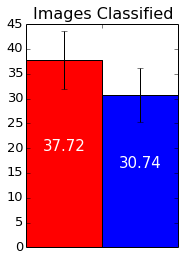

In [115]:
single_bar_chart(A,B,title="Images Classified")

# Assistive Tools usage 

In [91]:
hints = np.array(dataB["hints_count"])
print "Hints"
print "mu = :",mean(hints)
print "std = ", std(hints)
# plt.hist(hints)

Hints
mu = : 5.59574468085
std =  8.21430919246


In [105]:
A = np.array(dataA["restart_count"])
B = np.array(dataB["restart_count"])
# plt.hist(A)
# plt.hist(B)
run_all_non_parametric_analysis(A,B,"Restart")

---------------------------------------------------------------------------------
Restart
Median
A:  0.0
B:  0.0
A = B
------
A: mu = 0.739; std = 1.737
B: mu = 0.043; std = 0.289
A : W = 0.49 ; p =2.14785411679e-11 ---> NOT Normal
B : W = 0.13 ; p =3.61440393538e-15 ---> NOT Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 1318, p-value = 0.001806

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.324254794942 -----> Medium
Restart : p =0.0009714 ---> NOT from same population
Z = 3.127, p-value = 0.0009714

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 52.15217

Mean ranks of group
[1] 41.95745



In [93]:
A = np.array(dataA["examples_count"])
B = np.array(dataB["examples_count"])
# plt.hist(A)
# plt.hist(B)
run_all_non_parametric_analysis(A,B,"Example")

---------------------------------------------------------------------------------
Example
Median
A:  0.0
B:  0.0
A = B
------
A: mu = 0.065; std = 0.323
B: mu = 0.702; std = 1.597
A : W = 0.21 ; p =2.2679905168e-14 ---> NOT Normal
B : W = 0.51 ; p =2.58580466067e-11 ---> NOT Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 848, p-value = 0.004069

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.298528023396 -----> Small
Z = -2.8789, p-value = 0.004226

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 41.93478

Mean ranks of group
[1] 51.95745



#### More people were clicking on restarts in group A, which meant they were more unsure about their responses. There was more clicks in example pages in B because they were more engaged 

The number of non-zeros in counts in assistive tools shows more engagement

In [108]:
A_assistive_tools_count = np.array(dataA["examples_count"]+dataA["restart_count"])

In [109]:
print len(np.where(A_assistive_tools_count !=0.)[0]) / float(len(dataA)) * 100 ,"% of participants in group A used assistive tools."

26.0869565217 % of participants in group A used assistive tools.


In [110]:
B_assistive_tools_count = np.array(dataB["hints_count"]+dataB["examples_count"]+dataB["restart_count"])
print len(np.where(B_assistive_tools_count!=0.)[0]) / float(len(dataB)) * 100 ,"% of participants in group A used assistive tools."

72.3404255319 % of participants in group A used assistive tools.
